# Select reference cells

## 1. Set up the notebook

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from SEMITONES.cell_selection import from_knn_dist
from SEMITONES.cell_selection import from_gui
from SEMITONES.cell_selection import from_2D_embedding
from SEMITONES.cell_selection import get_cells_from_gui

from sklearn.metrics.pairwise import pairwise_kernels

## 2. Load the preprocessed data

In [3]:
os.chdir("../nestorowa")  # point to data directory

In [4]:
data = pd.read_hdf("nestorowa_processed.h5")  # counts
PC20 = np.loadtxt("nestorowa_20PC.txt", delimiter="\t")  # top 20 PCs
UMAP = np.loadtxt("nestorowa_UMAP.txt", delimiter="\t")  # 2D UMAP

Plot the UMAP of the data

(-10.343870633369932, 6.113633626228818, -4.153003164899327, 7.211967655789831)

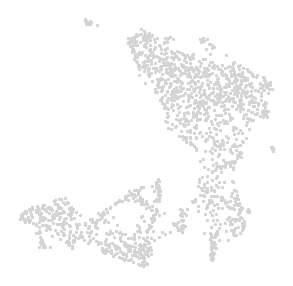

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(UMAP[:, 0], UMAP[:, 1], s=5, color="lightgrey")
ax = plt.gca()
ax.axis("off")

## 3. Data-driven selection of reference cells

In [6]:
g = 8.6e-4  # gamma parameter for the RBF-kernel

First, we define a starting cell. In this case, we will you the median least similar cell to all other cells in the population.

In [7]:
S = pairwise_kernels(PC20, metric="rbf", gamma=g)  # pariwise similarities
median = np.median(S, axis=0)  # median similarity per cell
furthest = np.min(median)  # least similar cell on average
start = int(np.where(median == furthest)[0])  # get the cell index

Use from_dist_knn to get a set of 17 reference cells, which is roughly 1 percent of the total population

In [8]:
dd_rcells = from_knn_dist(X=PC20,  # search in the 20 PC space
                          n_ret=17,
                          start=start,  # provide the least similar cell
                          metric="rbf",  # define the (dis)similarity metric
                          metric_params={"gamma": g})  # provide the gamma

Now, we visualize the selected cells

(-10.345965101726488, 6.157617461716476, -4.153003164899327, 7.211967655789831)

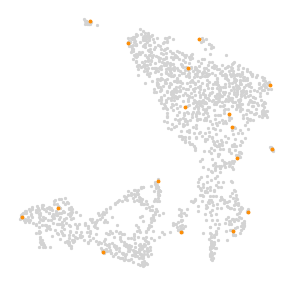

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(UMAP[:, 0], UMAP[:, 1], s=5, color="lightgrey")
plt.scatter(UMAP[dd_rcells, 0], UMAP[dd_rcells, 1], s=8, c="darkorange")
ax = plt.gca()
ax.axis("off")

We will save these cells for use in notebook 2 and 3

In [10]:
with open("nestorowa_dd_rcells.txt", "w") as f:
    f.write("\n".join(str(rcell) for rcell in sorted(dd_rcells)))
f.close()

## 4. Manual selection of reference cells

First, we initialize the widget

In [11]:
widget = from_gui(UMAP, figsize=(500, 500))

We plot the widget and select reference cells

In [12]:
widget

FigureWidget({
    'data': [{'marker': {'color': [#ffffff, #ffffff, #ffffff, ..., #ffffff,
                   …

We extract the reference cells from the widget

In [13]:
gui_rcells = get_cells_from_gui(widget)

And we check our selection

(-10.346182348735764, 6.162179648911296, -4.153003164899327, 7.211967655789831)

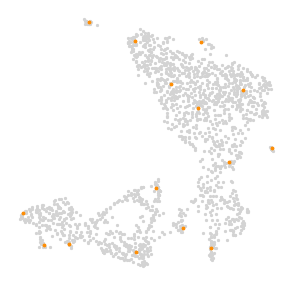

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(UMAP[:, 0], UMAP[:, 1], s=5, color="lightgrey")
plt.scatter(UMAP[gui_rcells, 0], UMAP[gui_rcells, 1], s=8, c="darkorange")
ax = plt.gca()
ax.axis("off")

## 5. Grid-based cell selection

In [15]:
grid_rcells = from_2D_embedding(UMAP,  # inpute the 2D UMAP
                                g=(4, 4))  # select cells from a 4 by 4 grid

(-10.343870633369932, 6.113633626228818, -4.15575416966052, 7.269738755774877)

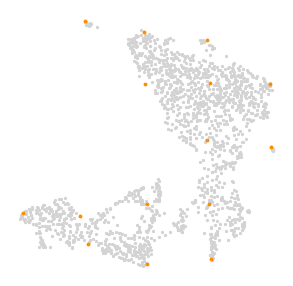

In [16]:
plt.figure(figsize=(5, 5))
plt.scatter(UMAP[:, 0], UMAP[:, 1], s=5, color="lightgrey")
plt.scatter(UMAP[grid_rcells, 0], UMAP[grid_rcells, 1], s=8, c="darkorange")
ax = plt.gca()
ax.axis("off")